# July 15 - Latent vector analysis

In [2]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random
import torch

In [23]:
# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

np.set_printoptions(threshold=np.inf)

def plot_event(run_id, iteration, mode):
    
    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
    
    if mode is "validation":
        np_arr_path = dump_dir + "val_iteration_" + str(iteration) + ".npz"
    else:
        np_arr_path = dump_dir + "iteration_" + str(iteration) + ".npz"
    
    # Load the numpy array
    np_arr = np.load(np_arr_path)
    np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["prediction"], np_arr["labels"], np_arr["energies"]

    i = random.randint(0, np_labels.shape[0]-1)
    plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                    label_dict[np_labels[i]], np_energies[i].item(),
                                    show_plot=True)

    plot_utils.plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                                np_recon, iteration, num_bins=200)
    
def plot_log(run_id, model_name, iteration, variant, mode):

    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

    # Setup the path to the training log file
    if mode is "training":
        log = dump_dir + "log_train.csv"
    elif mode is "training_validation":
        log = dump_dir + "val_test.csv"
    elif mode is "validation":
        log = dump_dir + "validation_log.csv"
    else:
        print("mode has to be one of training, training_validation, validation")
        return None
    
    downsample_interval = 32 if mode is "training" else None

    if variant is "AE":
        plot_utils.plot_ae_training([log], [model_name], {model_name:["red"]},
                                 downsample_interval=downsample_interval, show_plot=True, legend_loc=(0.8,0.8))
    elif variant is "VAE":
        plot_utils.plot_vae_training([log], [model_name], {model_name:["red", "blue"]},
                                 downsample_interval=downsample_interval, show_plot=True, legend_loc=(0.8,0.8))
        
    if iteration is not None:
        plot_event(run_id, iteration, mode=mode)

## 1. Load the latent vectors into memory

## Model of interest : VAE with single linear layer after the reparameterization which does not show any decrease in either the MSE loss and the VAE loss, Baseline model with no weights loaded

## Latent vectors stored at 3 iterations during training : start of the training, middle of the training and end of the training

## Iterations = 3, 1500, 3000

In [9]:
run_id = "20190713_182534"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Load the numpy array for the various iterations
np_arr_0 = np.load(dump_dir + "iteration_" + str(3) + ".npz")
np_arr_1 = np.load(dump_dir + "iteration_" + str(1500) + ".npz")
np_arr_2 = np.load(dump_dir + "iteration_" + str(3000) + ".npz")

# Extract the latent vector np arrays from the loaded archive
np_arr_0_z, np_arr_1_z, np_arr_2_z = np_arr_0["z"], np_arr_1["z"], np_arr_2["z"]

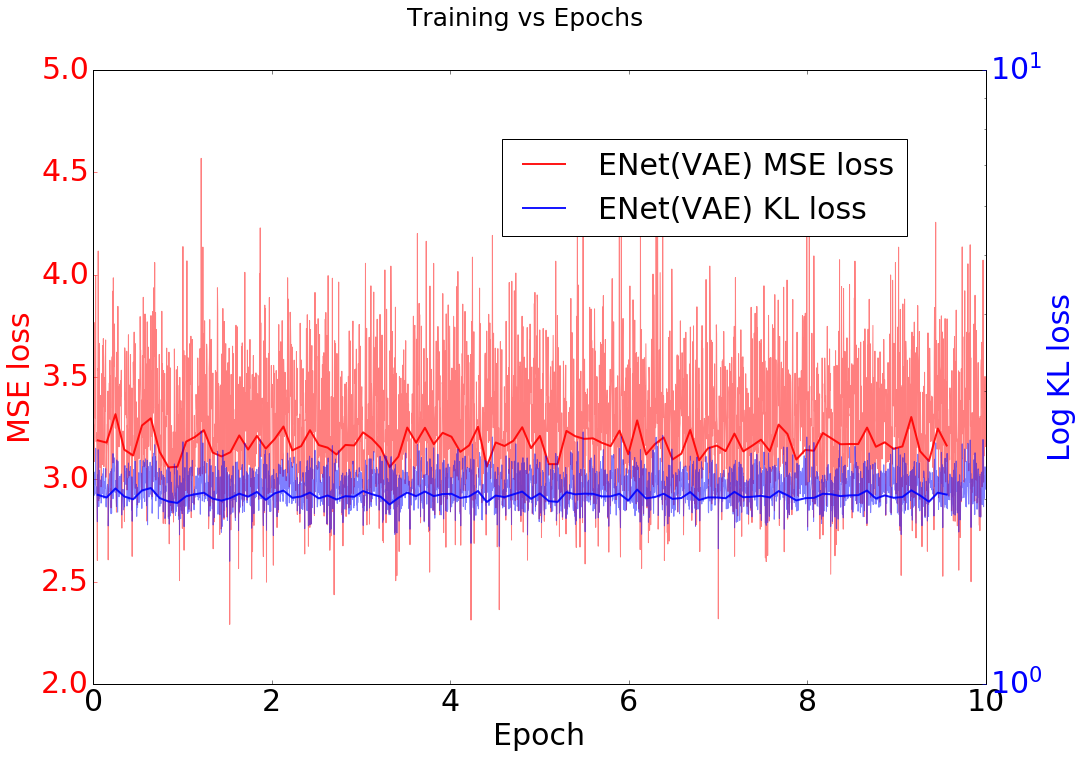

In [24]:
plot_log("20190713_182534", "ENet(VAE)", None, "VAE", "training")

## Plot the histogram for only one of the dimensions (dim = 0) from each iteration

In [13]:
np_arr_0_z_0 = np_arr_0_z[:,0]
np_arr_1_z_0 = np_arr_1_z[:,0]
np_arr_2_z_0 = np_arr_2_z[:,0]

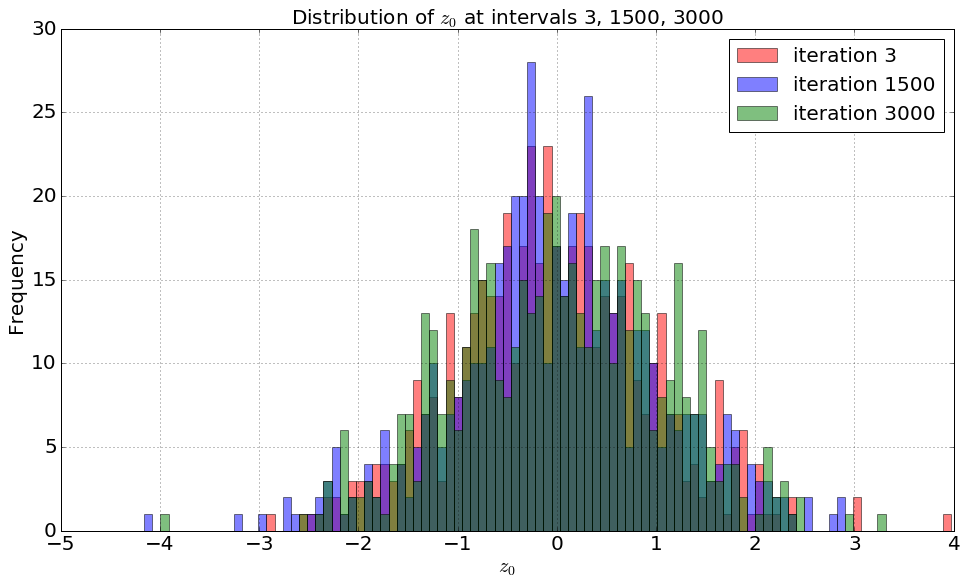

In [20]:
num_bins = 100

# Initialize the plot and corresponding parameters
fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
ax.tick_params(axis="both", labelsize=20)

# Setup the bins beforehand
bins = np.linspace(min(np.amin(np_arr_0_z_0), np.amin(np_arr_1_z_0), np.amin(np_arr_2_z_0)),
                   max(np.amax(np_arr_0_z_0), np.amax(np_arr_1_z_0), np.amax(np_arr_2_z_0)),
                   num_bins)

plt.hist(np_arr_0_z_0, bins, density=False,
         label="iteration 3", color="red",
         alpha=0.5, stacked=True)

plt.hist(np_arr_1_z_0, bins, density=False,
         label="iteration 1500", color="blue",
         alpha=0.5, stacked=True)

plt.hist(np_arr_2_z_0, bins, density=False,
         label="iteration 3000", color="green",
         alpha=0.5, stacked=True)

# Setup the axes
ax.set_xlabel(r"$z_0$", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

plt.legend(loc="upper right", prop={"size":20})
plt.grid(True)
plt.title(r"Distribution of $z_0$ at intervals 3, 1500, 3000", fontsize=20)

plt.show()

## The values of $z_0$ seem to be following a gaussian distribution but with a relatively high variance.

## 2. Plot the same histogram as above but with the latent vectors of a VAE which does relatively well during training i.e. no linear layer after the reparameterization

## No pre-loaded weights

## Plot only the $z$ dimension 0 = $z_0$

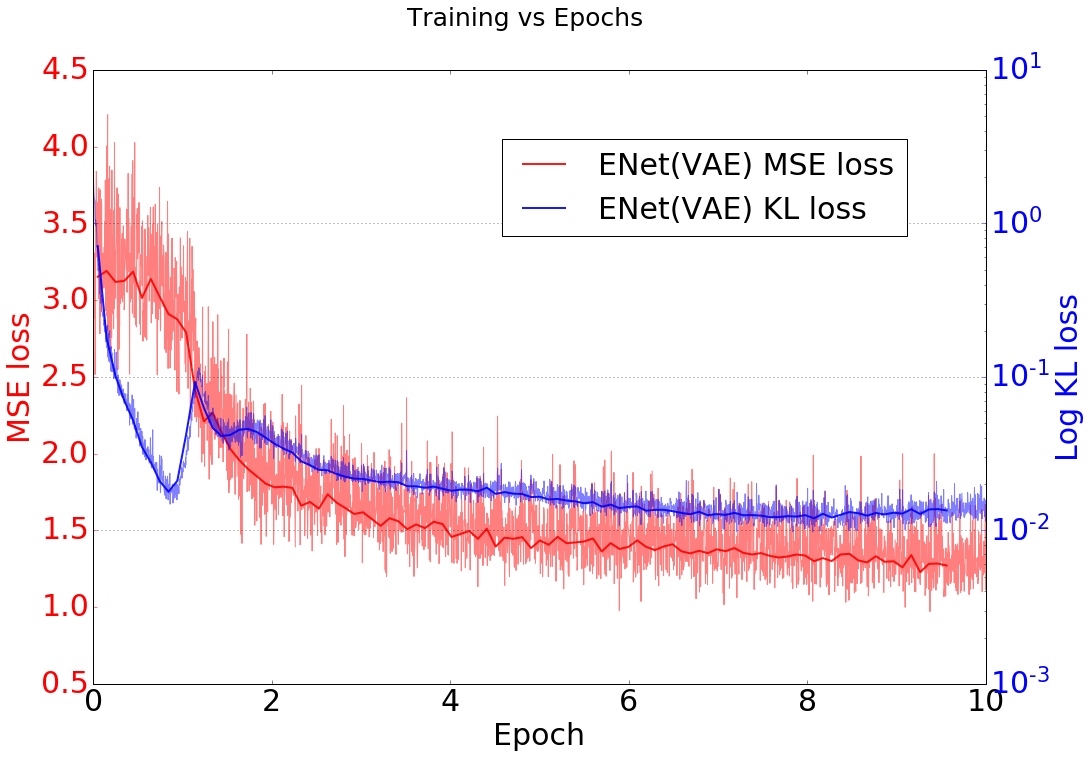

In [25]:
plot_log("20190715_160636", "ENet(VAE)", None, "VAE", "training")

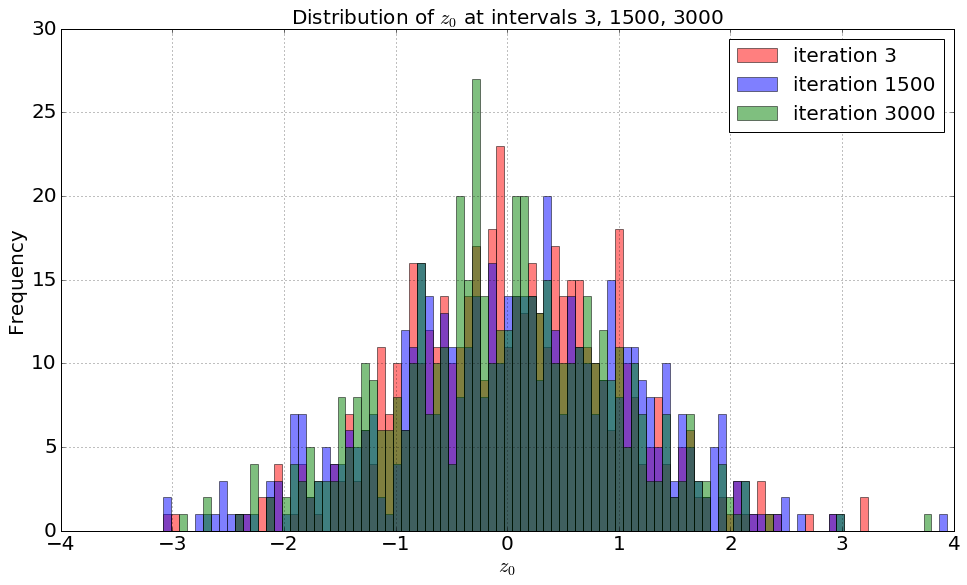

In [26]:
run_id = "20190715_160636"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Load the numpy array for the various iterations
np_arr_0 = np.load(dump_dir + "iteration_" + str(3) + ".npz")
np_arr_1 = np.load(dump_dir + "iteration_" + str(1500) + ".npz")
np_arr_2 = np.load(dump_dir + "iteration_" + str(3000) + ".npz")

# Extract the latent vector np arrays from the loaded archive
np_arr_0_z, np_arr_1_z, np_arr_2_z = np_arr_0["z"], np_arr_1["z"], np_arr_2["z"]

np_arr_0_z_0 = np_arr_0_z[:,0]
np_arr_1_z_0 = np_arr_1_z[:,0]
np_arr_2_z_0 = np_arr_2_z[:,0]

num_bins = 100

# Initialize the plot and corresponding parameters
fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
ax.tick_params(axis="both", labelsize=20)

# Setup the bins beforehand
bins = np.linspace(min(np.amin(np_arr_0_z_0), np.amin(np_arr_1_z_0), np.amin(np_arr_2_z_0)),
                   max(np.amax(np_arr_0_z_0), np.amax(np_arr_1_z_0), np.amax(np_arr_2_z_0)),
                   num_bins)

plt.hist(np_arr_0_z_0, bins, density=False,
         label="iteration 3", color="red",
         alpha=0.5, stacked=True)

plt.hist(np_arr_1_z_0, bins, density=False,
         label="iteration 1500", color="blue",
         alpha=0.5, stacked=True)

plt.hist(np_arr_2_z_0, bins, density=False,
         label="iteration 3000", color="green",
         alpha=0.5, stacked=True)

# Setup the axes
ax.set_xlabel(r"$z_0$", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

plt.legend(loc="upper right", prop={"size":20})
plt.grid(True)
plt.title(r"Distribution of $z_0$ at intervals 3, 1500, 3000", fontsize=20)

plt.show()

## We see similar distribution for two different VAEs which perform very differently : Both without any trained weights, one with the linear layer after the reparameterization and one without the linear layer after the reparameterization. The variance is definitely lower for the better performing VAE

## 3. Maybe the results from 1 dimension of the z are misleading, use all the 5120 dimensions and see how the results change

## Bad performing VAE

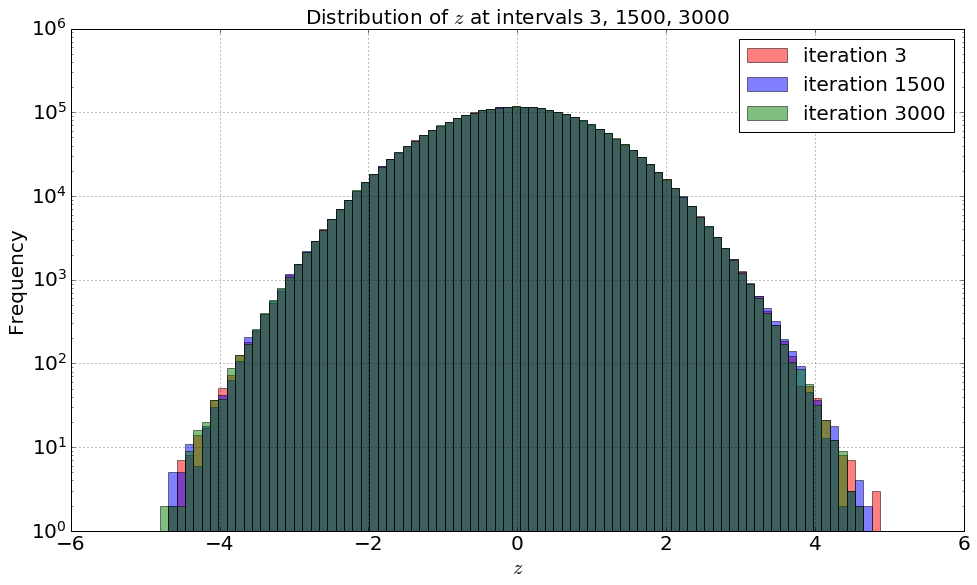

In [28]:
run_id = "20190713_182534"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Load the numpy array for the various iterations
np_arr_0 = np.load(dump_dir + "iteration_" + str(3) + ".npz")
np_arr_1 = np.load(dump_dir + "iteration_" + str(1500) + ".npz")
np_arr_2 = np.load(dump_dir + "iteration_" + str(3000) + ".npz")

# Extract the latent vector np arrays from the loaded archive
np_arr_0_z, np_arr_1_z, np_arr_2_z = np_arr_0["z"], np_arr_1["z"], np_arr_2["z"]

np_arr_0_z_0 = np_arr_0_z.reshape(-1, 1)
np_arr_1_z_0 = np_arr_1_z.reshape(-1, 1)
np_arr_2_z_0 = np_arr_2_z.reshape(-1, 1)

num_bins = 100

# Initialize the plot and corresponding parameters
fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
ax.tick_params(axis="both", labelsize=20)

# Setup the bins beforehand
bins = np.linspace(min(np.amin(np_arr_0_z_0), np.amin(np_arr_1_z_0), np.amin(np_arr_2_z_0)),
                   max(np.amax(np_arr_0_z_0), np.amax(np_arr_1_z_0), np.amax(np_arr_2_z_0)),
                   num_bins)

plt.hist(np_arr_0_z_0, bins, density=False,
         label="iteration 3", color="red",
         alpha=0.5, stacked=True)

plt.hist(np_arr_1_z_0, bins, density=False,
         label="iteration 1500", color="blue",
         alpha=0.5, stacked=True)

plt.hist(np_arr_2_z_0, bins, density=False,
         label="iteration 3000", color="green",
         alpha=0.5, stacked=True)

# Setup the axes
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

plt.legend(loc="upper right", prop={"size":20})
plt.yscale("log")
plt.grid(True)
plt.title(r"Distribution of $z$ at intervals 3, 1500, 3000", fontsize=20)

plt.show()

## Good performing VAE

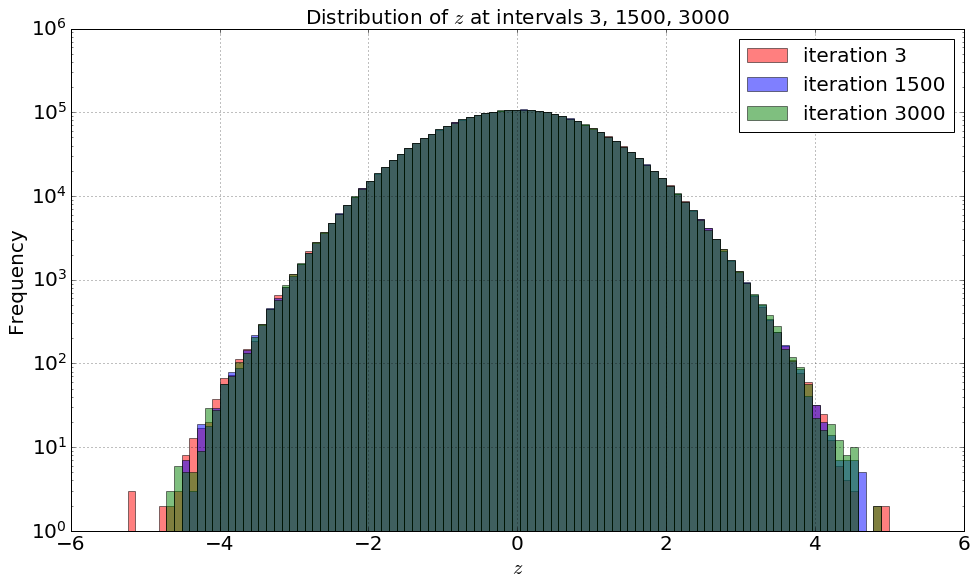

In [29]:
run_id = "20190715_160636"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Load the numpy array for the various iterations
np_arr_0 = np.load(dump_dir + "iteration_" + str(3) + ".npz")
np_arr_1 = np.load(dump_dir + "iteration_" + str(1500) + ".npz")
np_arr_2 = np.load(dump_dir + "iteration_" + str(3000) + ".npz")

# Extract the latent vector np arrays from the loaded archive
np_arr_0_z, np_arr_1_z, np_arr_2_z = np_arr_0["z"], np_arr_1["z"], np_arr_2["z"]

np_arr_0_z_0 = np_arr_0_z.reshape(-1, 1)
np_arr_1_z_0 = np_arr_1_z.reshape(-1, 1)
np_arr_2_z_0 = np_arr_2_z.reshape(-1, 1)

num_bins = 100

# Initialize the plot and corresponding parameters
fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
ax.tick_params(axis="both", labelsize=20)

# Setup the bins beforehand
bins = np.linspace(min(np.amin(np_arr_0_z_0), np.amin(np_arr_1_z_0), np.amin(np_arr_2_z_0)),
                   max(np.amax(np_arr_0_z_0), np.amax(np_arr_1_z_0), np.amax(np_arr_2_z_0)),
                   num_bins)

plt.hist(np_arr_0_z_0, bins, density=False,
         label="iteration 3", color="red",
         alpha=0.5, stacked=True)

plt.hist(np_arr_1_z_0, bins, density=False,
         label="iteration 1500", color="blue",
         alpha=0.5, stacked=True)

plt.hist(np_arr_2_z_0, bins, density=False,
         label="iteration 3000", color="green",
         alpha=0.5, stacked=True)

# Setup the axes
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

plt.legend(loc="upper right", prop={"size":20})
plt.yscale("log")
plt.grid(True)
plt.title(r"Distribution of $z$ at intervals 3, 1500, 3000", fontsize=20)

plt.show()

## These models clearly have a very large variance in the Gaussian distribution which might be a by-product of using identity in the $\mu$ linear layers and zeros in the $\Sigma$ linear layers.

## Remove those initializations and see how the network perform and how do the latent vector distribution looks like.

# More robust latent variable analysis

## Consider the two models we have : Both VAE, one with the linear layer after the reparameterization and one without the linear layer after the reparameterization

## One of the models perform well on the reconstruction task and the other model performs poorly

## From comparing the latent vectors generated by the two models, we can try to understand how relevant are the latent variable distributions to the model performance

## 1. Plotting the training log of well-working vs not working model

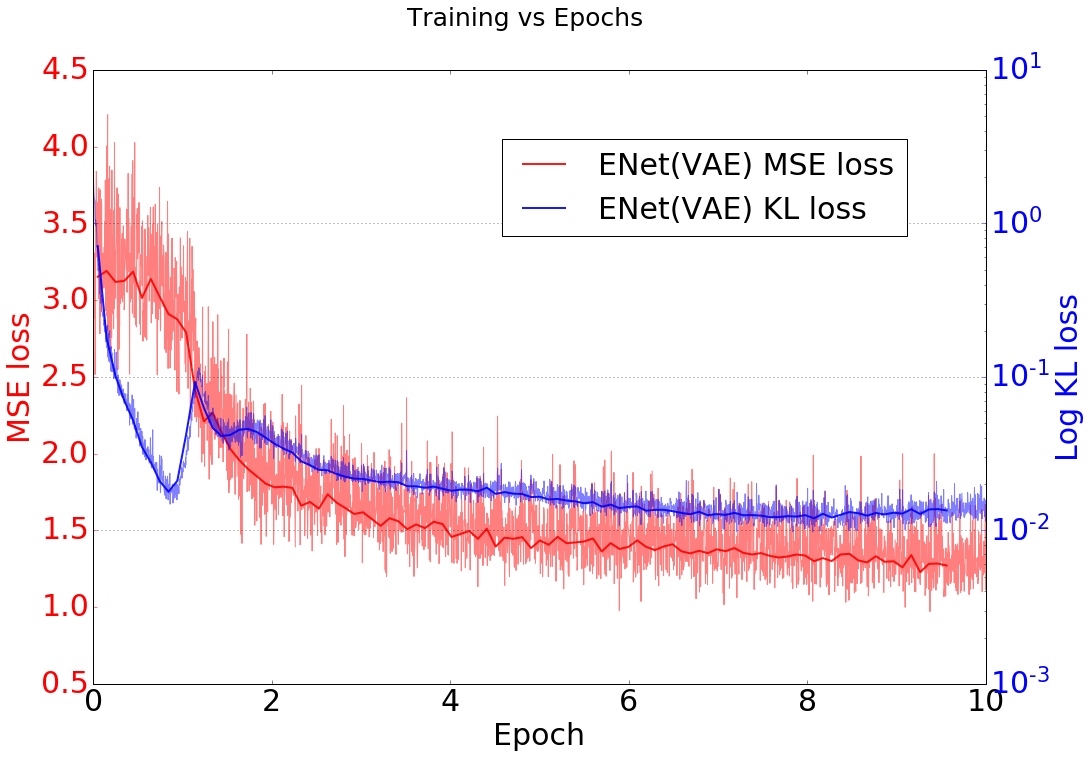

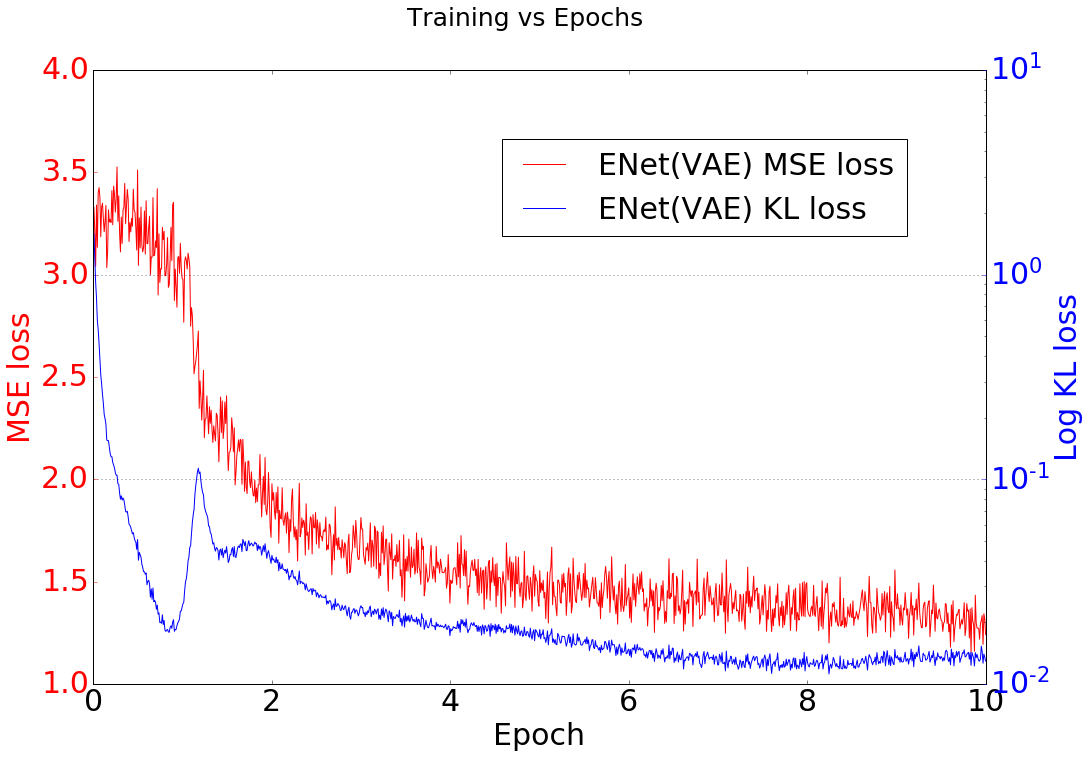

In [34]:
plot_log("20190715_160636", "ENet(VAE)", None, "VAE", "training")
plot_log("20190715_160636", "ENet(VAE)", None, "VAE", "training_validation")

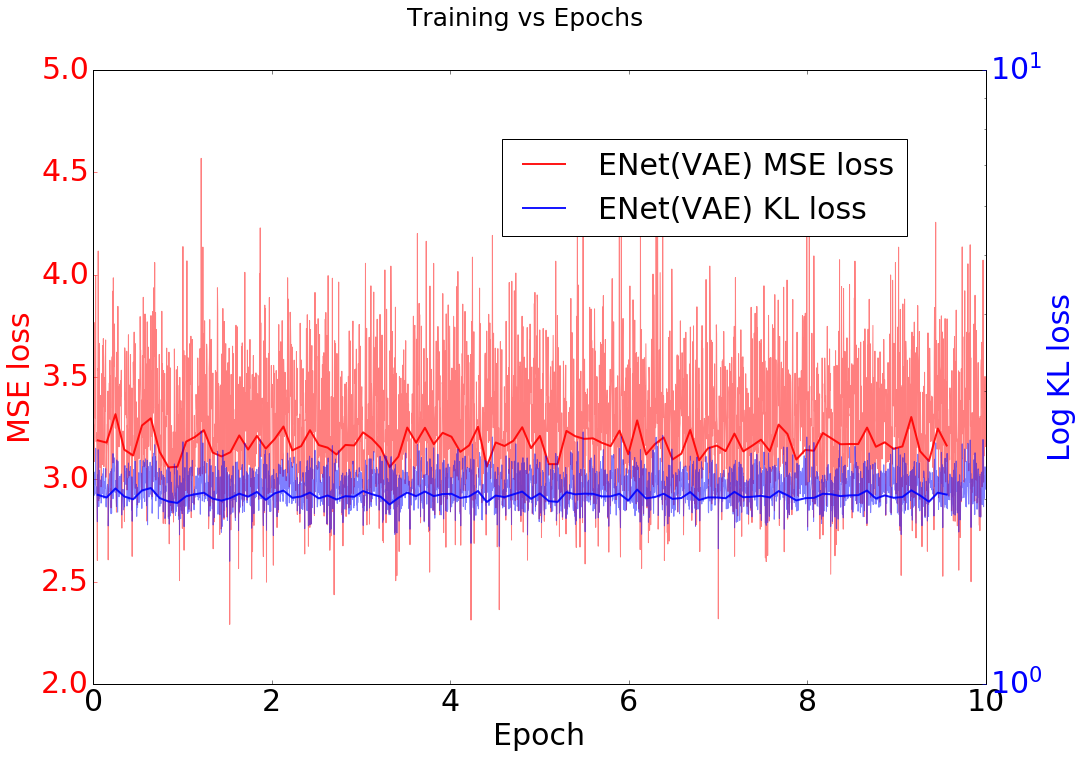

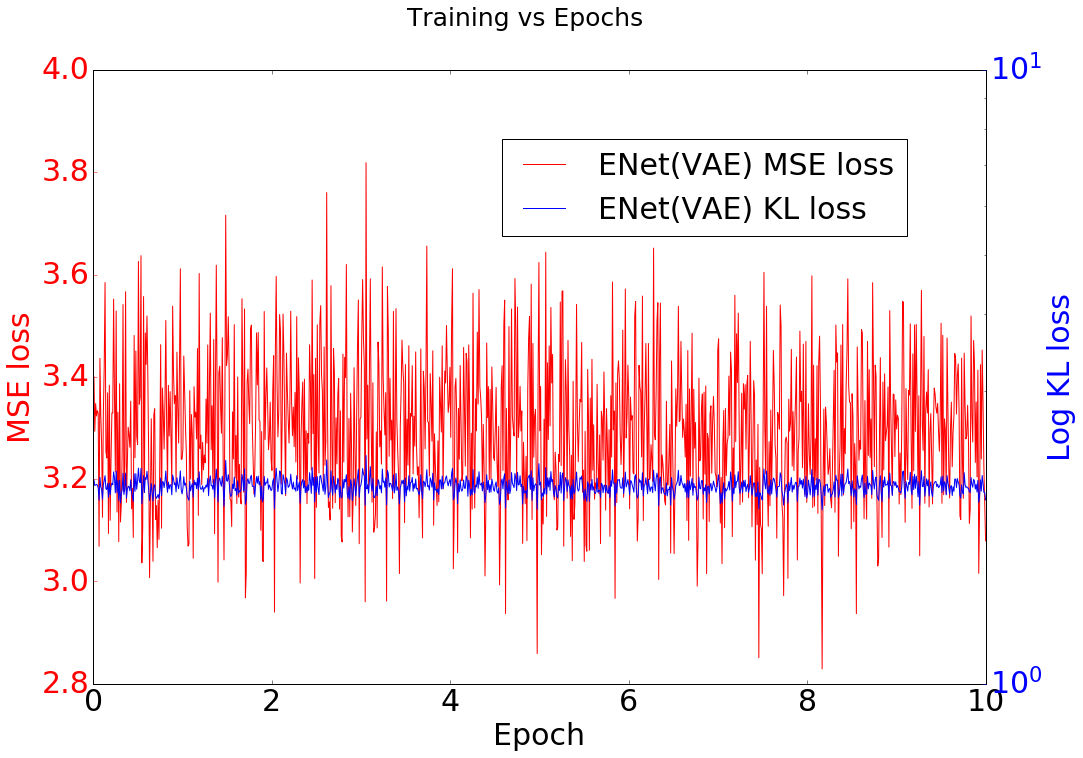

In [35]:
plot_log("20190713_182534", "ENet(VAE)", None, "VAE", "training")
plot_log("20190713_182534", "ENet(VAE)", None, "VAE", "training_validation")

## The difference b/w the two models is that one has a linear layer after the reparameterization and the other does not have a linear layer after the reparameterization. Check out their reconstructions.

## 2. Plot the reconstructions of well-working vs non-working model

## Without linear layer

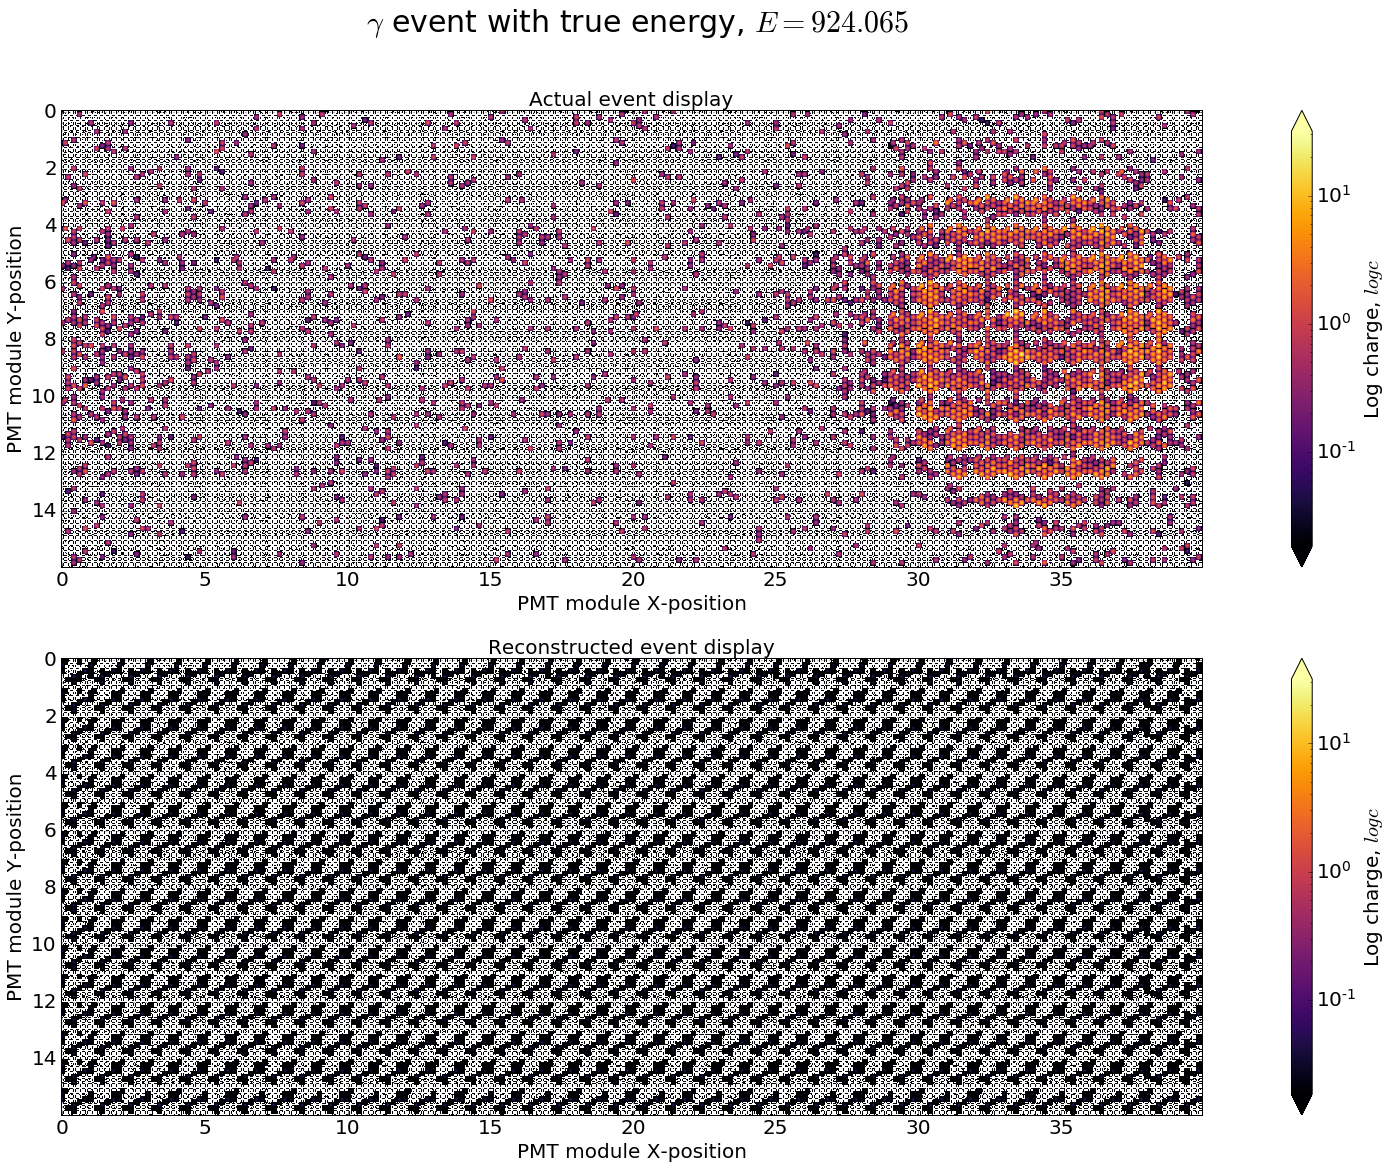

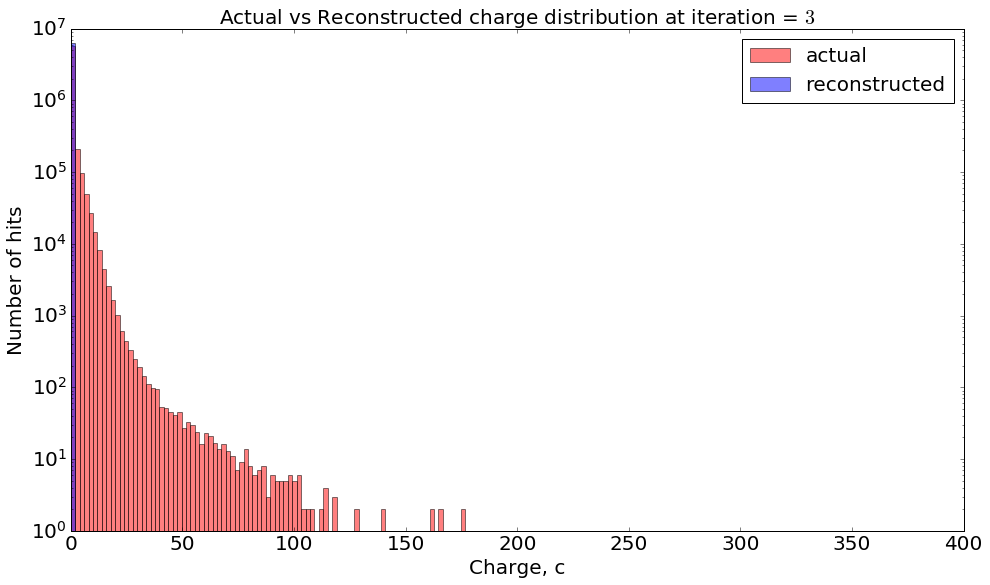

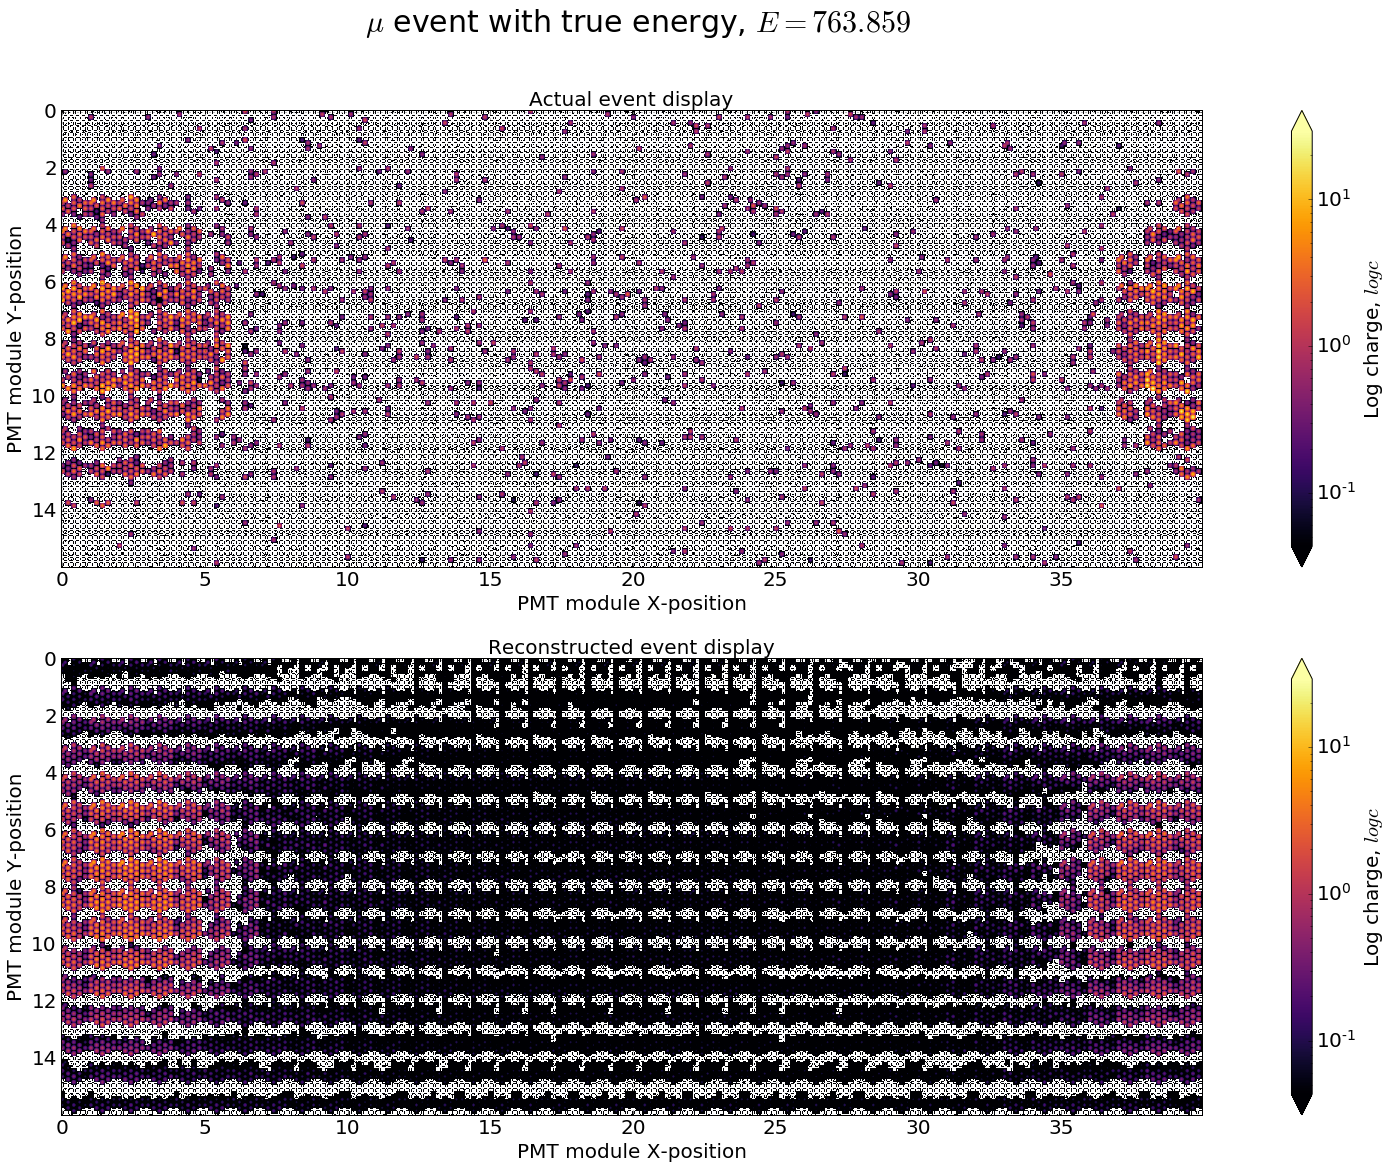

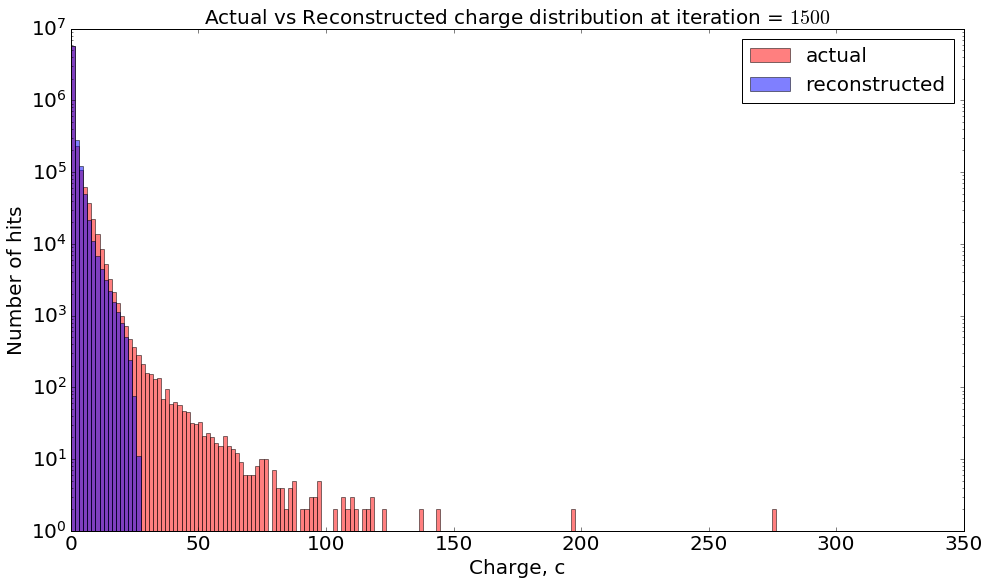

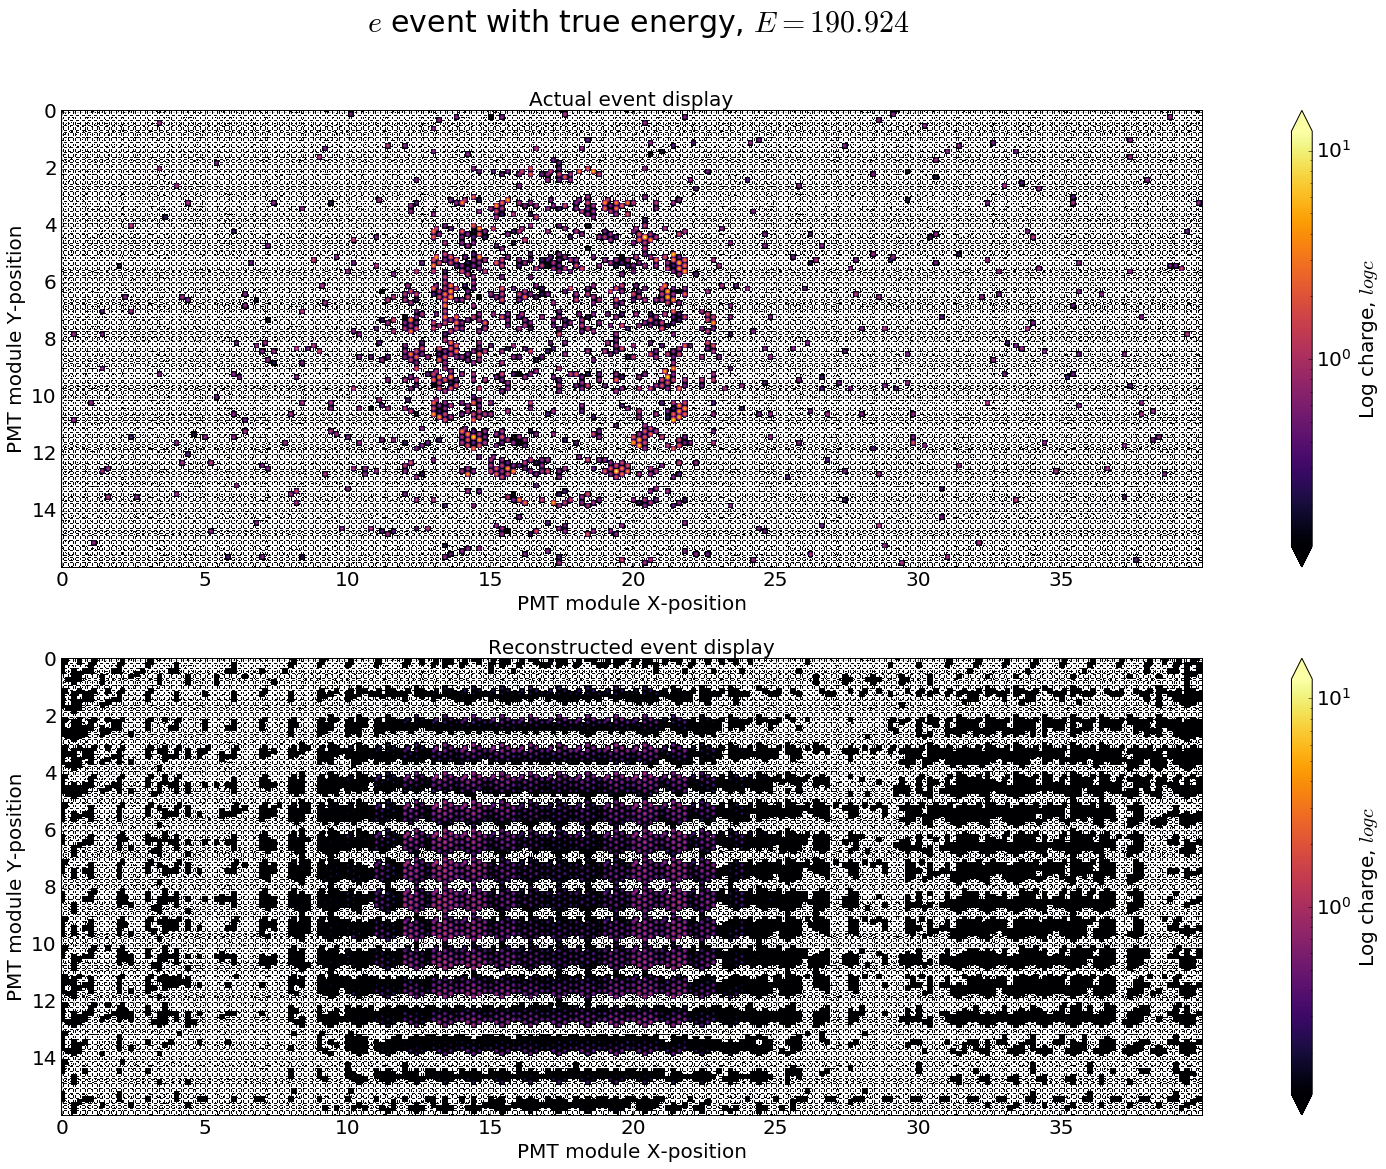

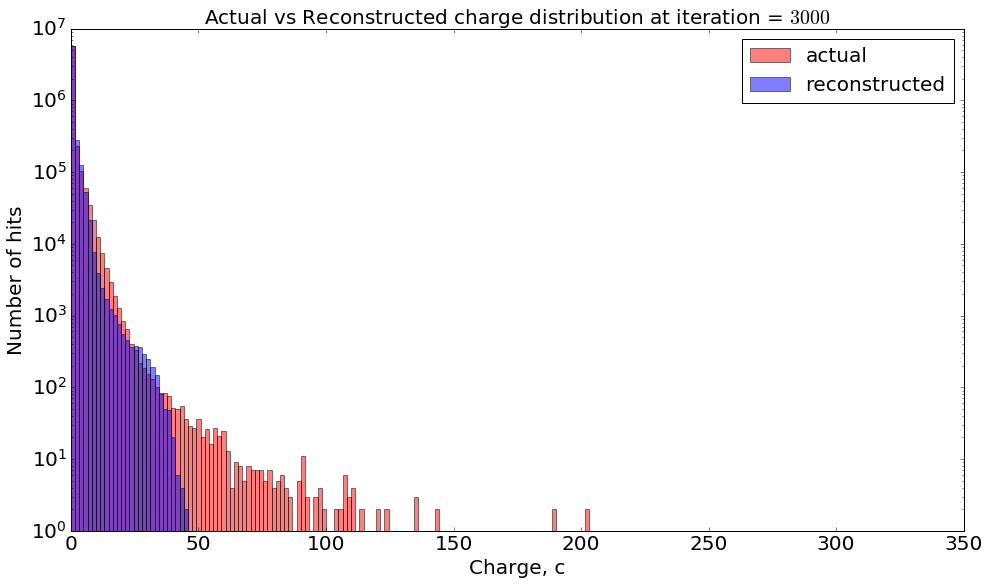

In [32]:
plot_event("20190715_160636", 3, "training_validation")
plot_event("20190715_160636", 1500, "training_validation")
plot_event("20190715_160636", 3000, "training_validation")

## With linear layer

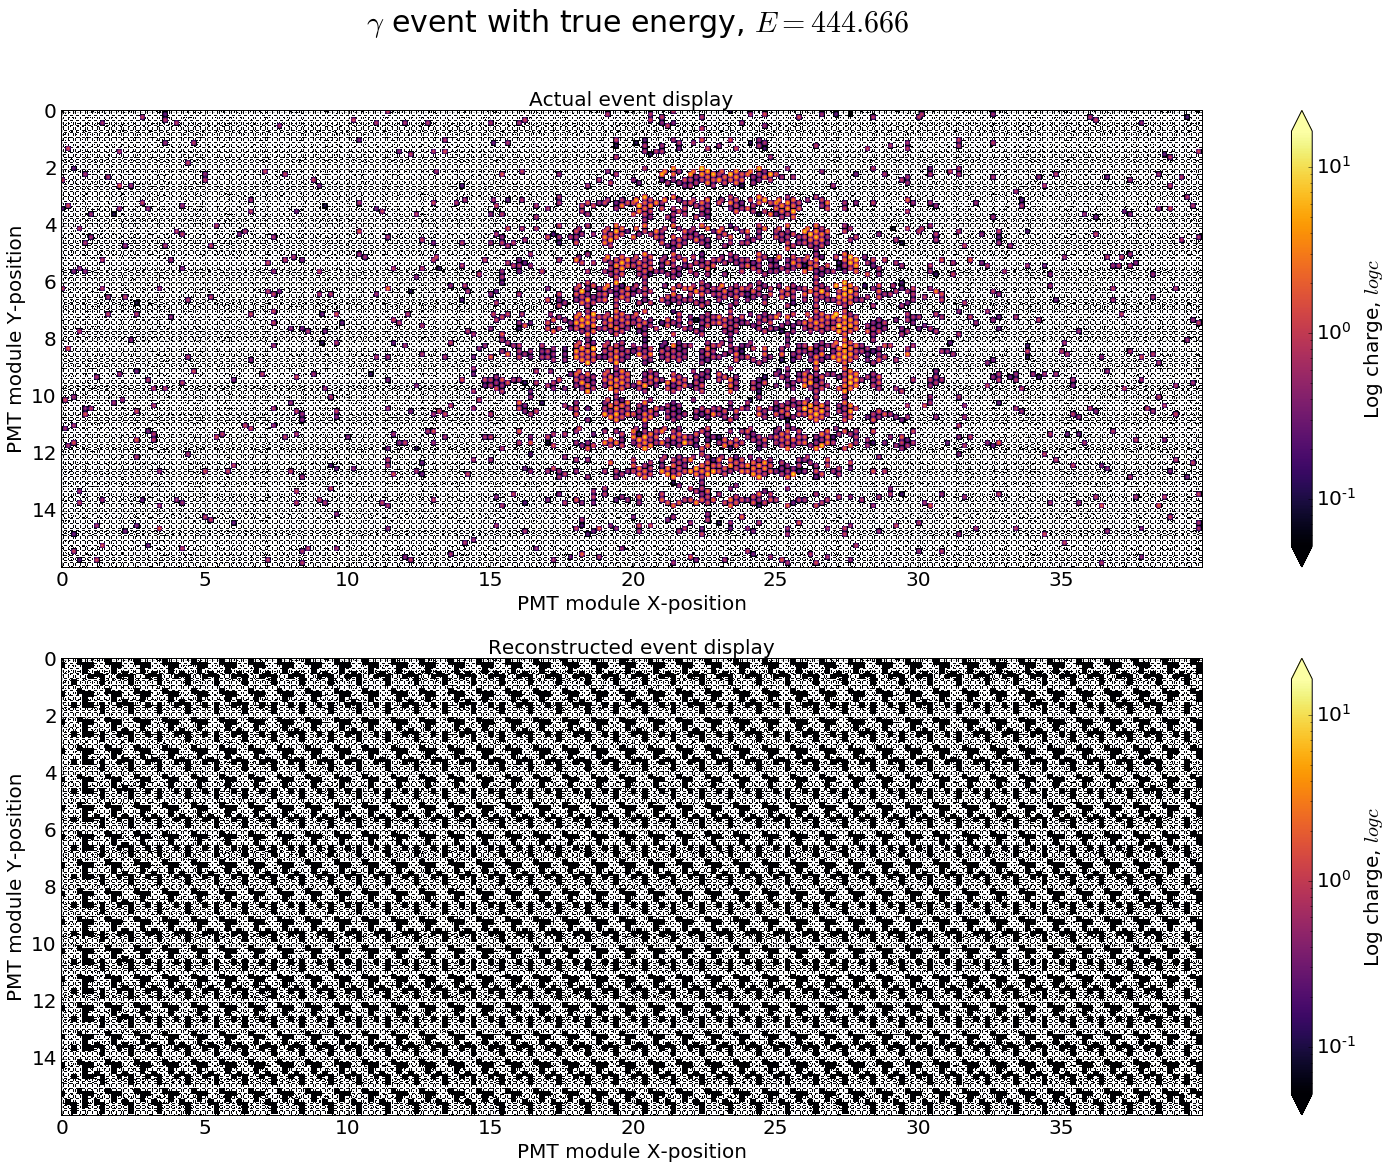

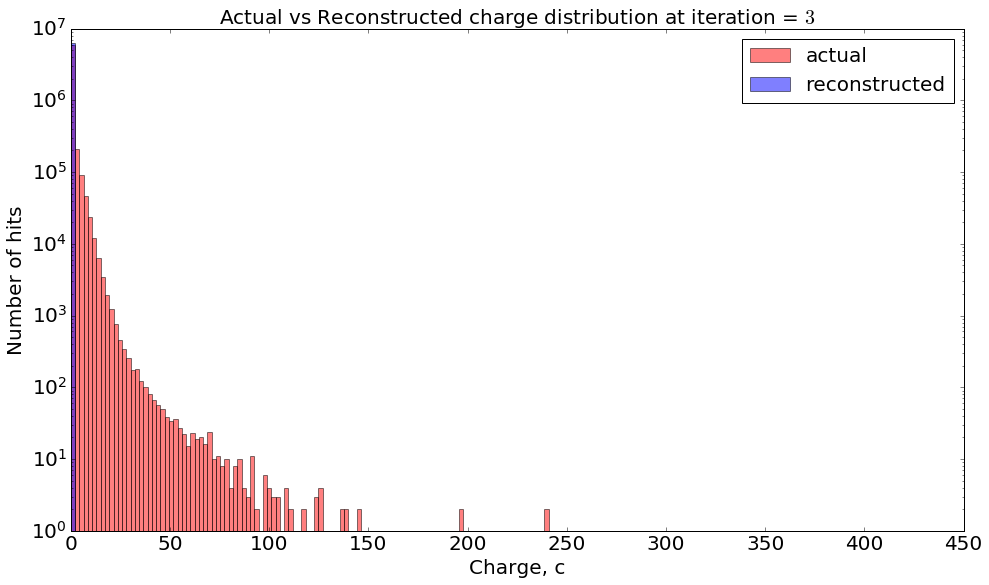

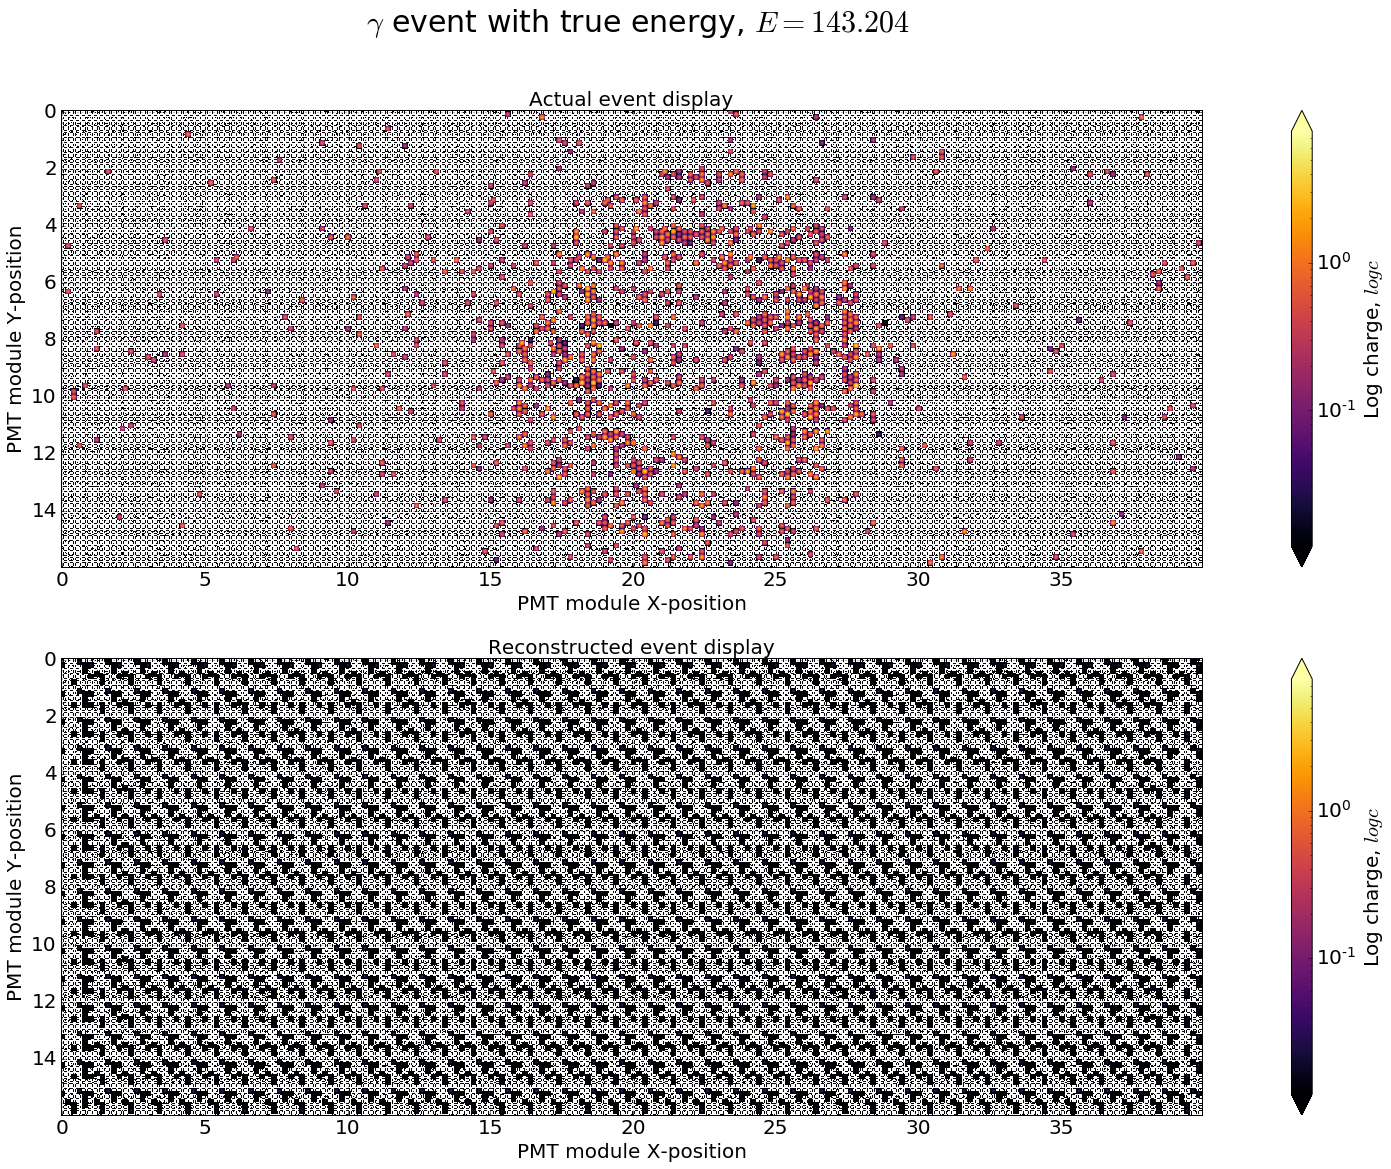

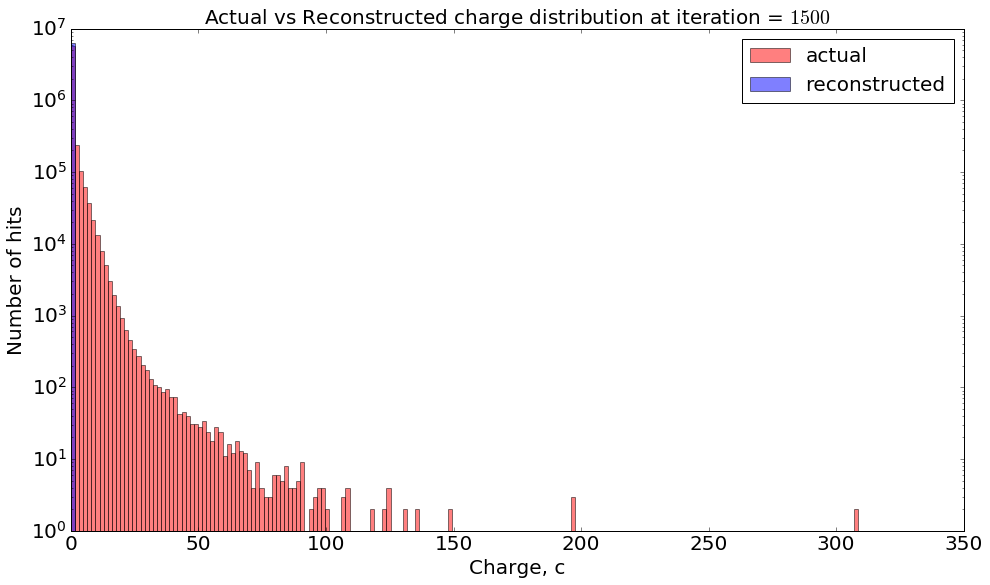

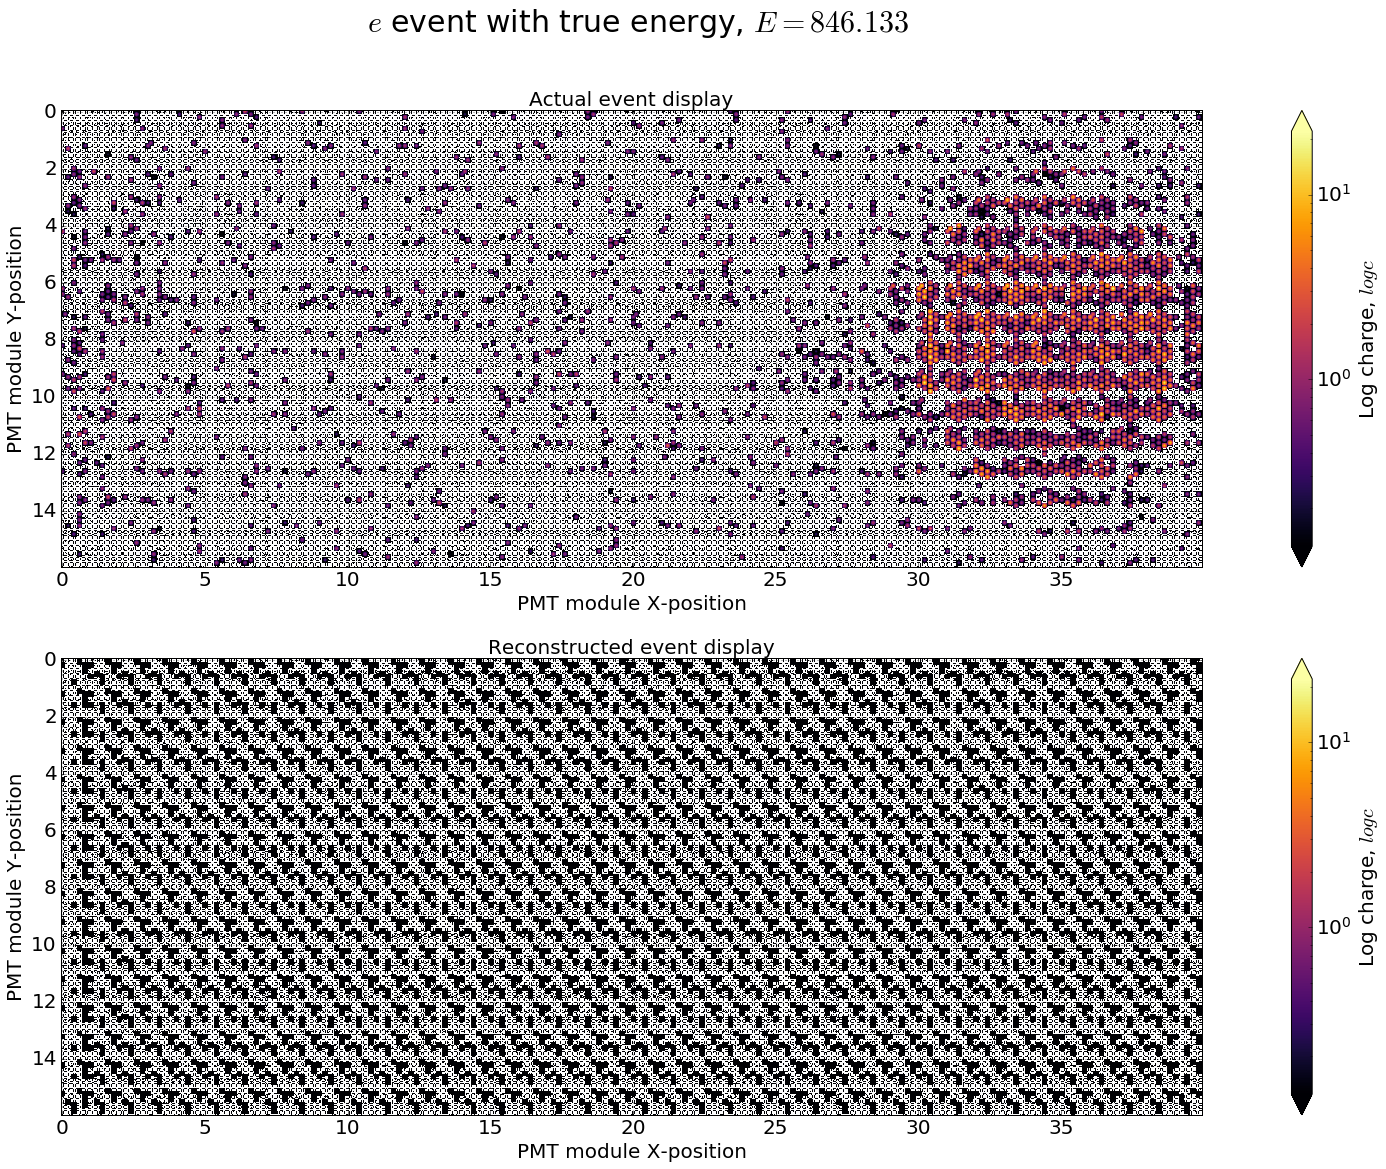

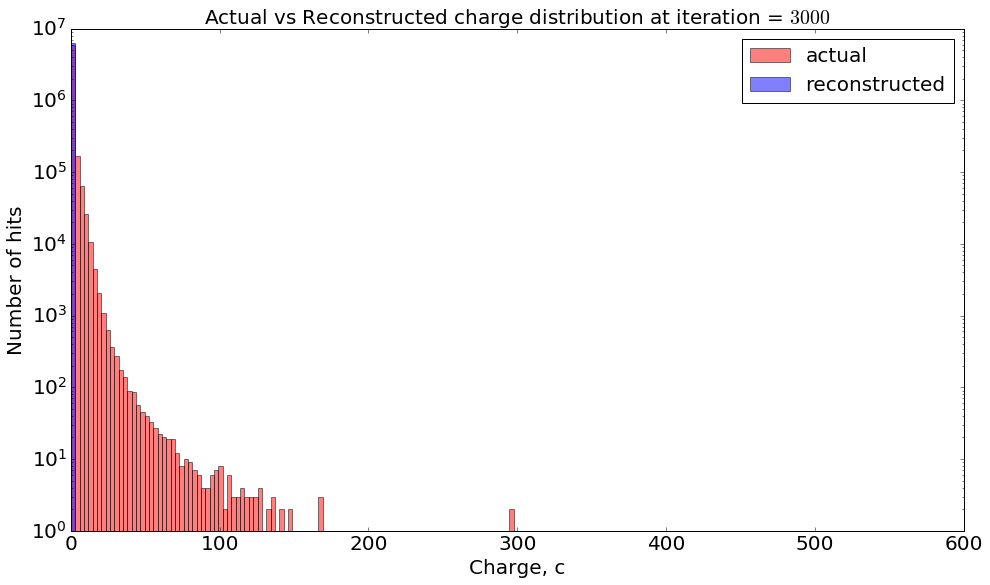

In [36]:
plot_event("20190713_182534", 3, "training_validation")
plot_event("20190713_182534", 1500, "training_validation")
plot_event("20190713_182534", 3000, "training_validation")

## Per dimension analysis plots

## Plot a scatter plot with the dimension number on the x-axis and the value on the y-axis

## Do for $\mu$ and $\sigma$

## Compute and collect the values from the latent vectors

In [112]:
run_id = "20190715_160636"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
iterations = [3000]
iteration_colors = ["red", "blue", "green"]

iteration_color_dict = {}
for i,iteration in enumerate(iterations):                    
    iteration_color_dict[iteration] = i

# Load the numpy array for the various iterations
np_arr_dict = {}
for iteration in iterations:
    np_arr_dict[iteration] = np.load(dump_dir + "iteration_" + str(iteration) + ".npz")["z"]

num_dims = np_arr_dict[list(np_arr_dict.keys())[0]].shape[1]
#num_dims = 100
scatter_values = {}

for iteration in iterations:
    
    iter_scatter_values_mu = []
    iter_scatter_values_std = []
    
    for i in range(num_dims):
        iter_scatter_values_mu.append(np.mean(np_arr_dict[iteration][:,i]))
        iter_scatter_values_std.append(np.std(np_arr_dict[iteration][:,i]))
        
    scatter_values[iteration] = [iter_scatter_values_mu, iter_scatter_values_std]

## Plot the scatter values computed in the last step

## Plot the scatter plot for $\mu$

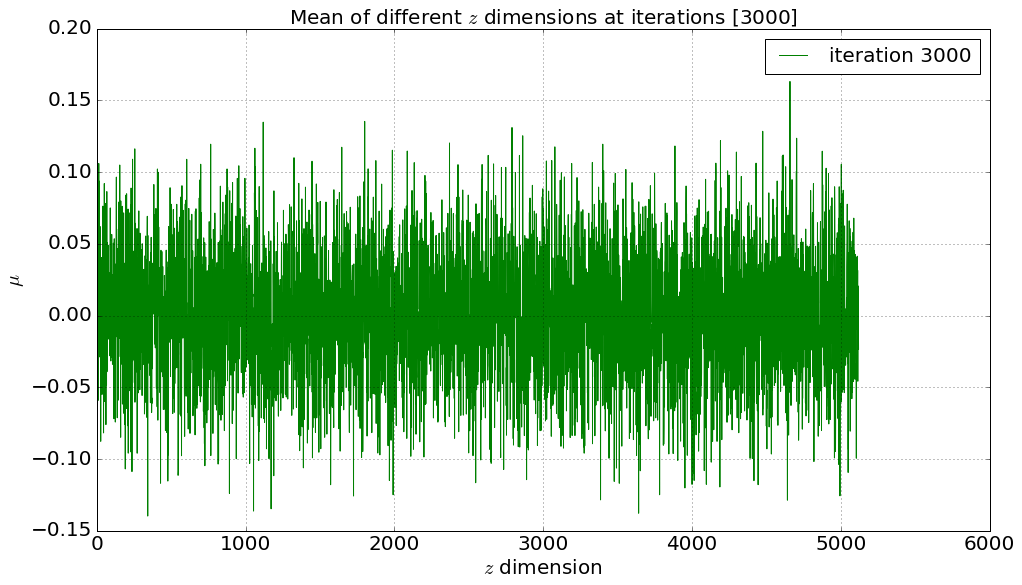

In [113]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
ax.tick_params(axis="both", labelsize=20)

# Use the dimensions as the values for the x-axis
x = np.linspace(1, num_dims, num_dims)

# Plot the scatter for mu values for each of the iteration
for iteration in iterations:
    plt.plot(x, scatter_values[iteration][0], color=iteration_dict[iteration],
                label="iteration {0}".format(iteration))
    
# Setup the axes
ax.set_xlabel(r"$z$ dimension", fontsize=20)
ax.set_ylabel(r"$\mu$", fontsize=20)

plt.legend(loc="upper right", prop={"size":20})
plt.grid(True)
plt.title(r"Mean of different $z$ dimensions at iterations {0}".format(iterations), fontsize=20)

plt.show()

## Plot the scatter plot for $\sigma$

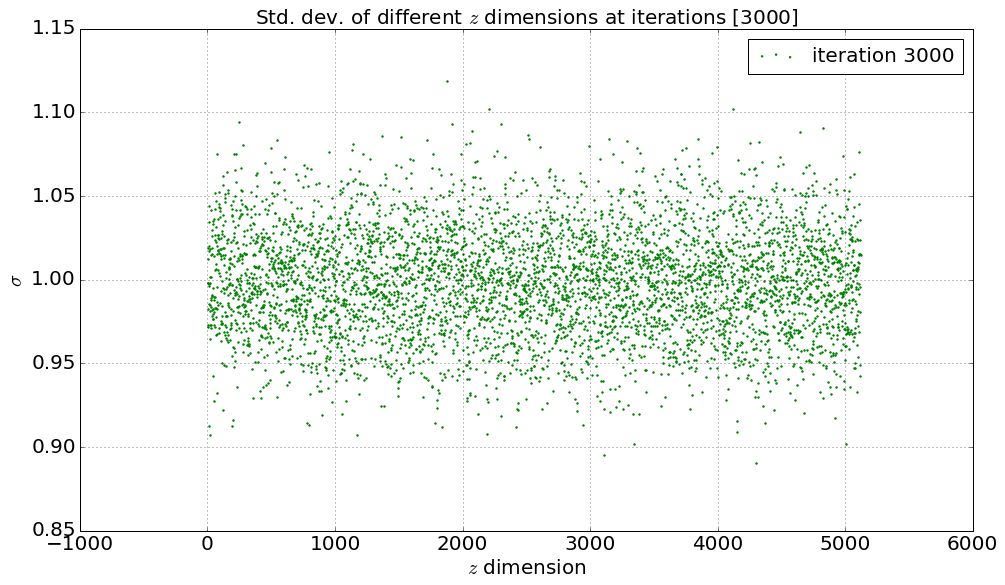

In [104]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
ax.tick_params(axis="both", labelsize=20)

# Use the dimensions as the values for the x-axis
x = np.linspace(1, num_dims, num_dims)

# Plot the scatter for mu values for each of the iteration
for iteration in iterations:
    plt.scatter(x, scatter_values[iteration][1], s=2, color=iteration_dict[iteration],
                label="iteration {0}".format(iteration))
    
# Setup the axes
ax.set_xlabel(r"$z$ dimension", fontsize=20)
ax.set_ylabel(r"$\sigma$", fontsize=20)

plt.legend(loc="upper right", prop={"size":20})
plt.grid(True)
plt.title(r"Std. dev. of different $z$ dimensions at iterations {0}".format(iterations), fontsize=20)

plt.show()

## Do the same as above but for the bad performing VAE

In [105]:
run_id = "20190713_182534"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
iterations = [3000]
iteration_colors = ["red", "blue", "green"]

iteration_color_dict = {}
for i,iteration in enumerate(iterations):                    
    iteration_color_dict[iteration] = i

# Load the numpy array for the various iterations
np_arr_dict = {}
for iteration in iterations:
    np_arr_dict[iteration] = np.load(dump_dir + "iteration_" + str(iteration) + ".npz")["z"]

num_dims = np_arr_dict[list(np_arr_dict.keys())[0]].shape[1]
scatter_values = {}

for iteration in iterations:
    
    iter_scatter_values_mu = []
    iter_scatter_values_std = []
    
    for i in range(num_dims):
        iter_scatter_values_mu.append(np.mean(np_arr_dict[iteration][:,i]))
        iter_scatter_values_std.append(np.std(np_arr_dict[iteration][:,i]))
        
    scatter_values[iteration] = [iter_scatter_values_mu, iter_scatter_values_std]

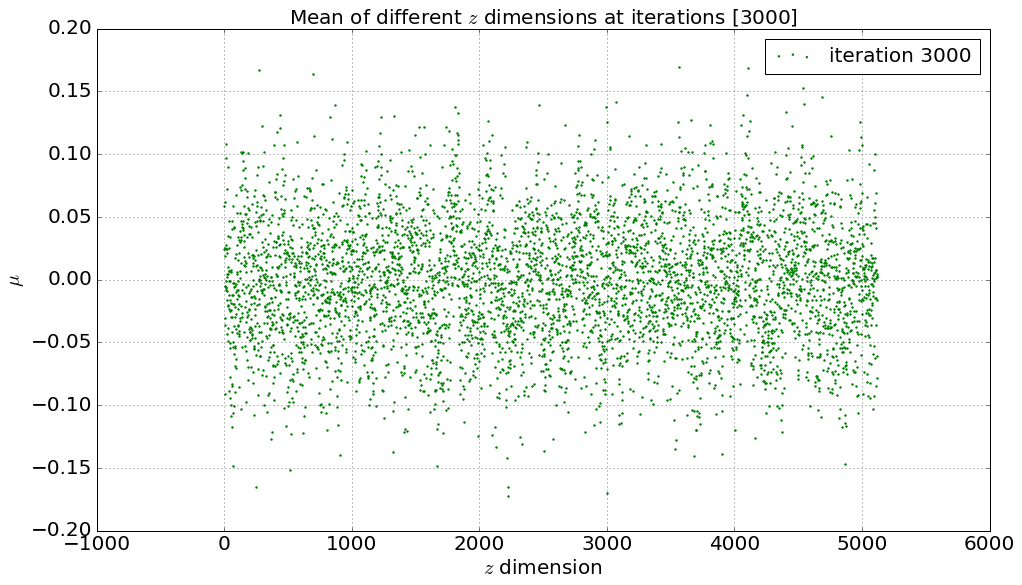

In [106]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
ax.tick_params(axis="both", labelsize=20)

# Use the dimensions as the values for the x-axis
x = np.linspace(1, num_dims, num_dims)

# Plot the scatter for mu values for each of the iteration
for iteration in iterations:
    plt.scatter(x, scatter_values[iteration][0], s=2, color=iteration_dict[iteration],
                label="iteration {0}".format(iteration))
    
# Setup the axes
ax.set_xlabel(r"$z$ dimension", fontsize=20)
ax.set_ylabel(r"$\mu$", fontsize=20)

plt.legend(loc="upper right", prop={"size":20})
plt.grid(True)
plt.title(r"Mean of different $z$ dimensions at iterations {0}".format(iterations), fontsize=20)

plt.show()

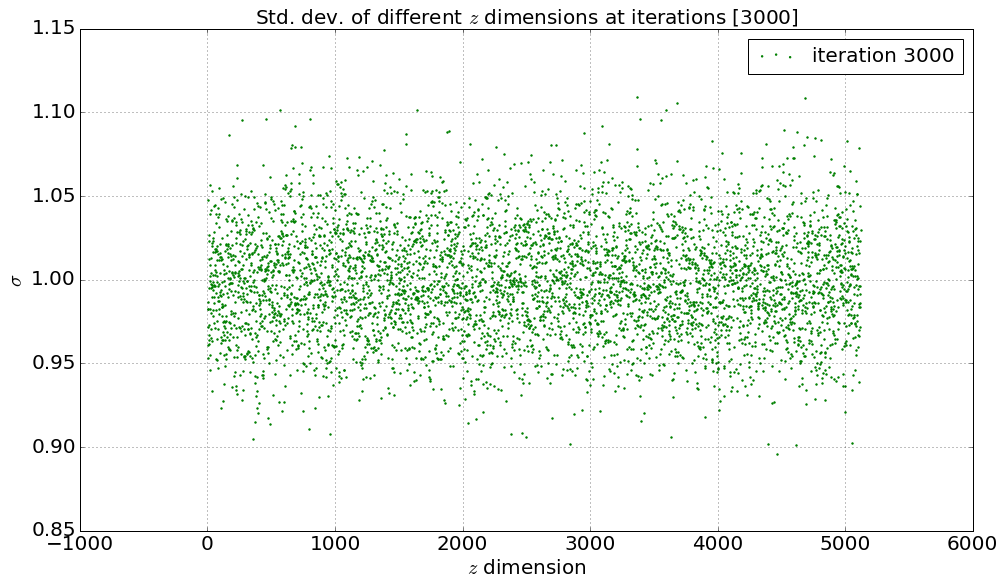

In [107]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
ax.tick_params(axis="both", labelsize=20)

# Use the dimensions as the values for the x-axis
x = np.linspace(1, num_dims, num_dims)

# Plot the scatter for mu values for each of the iteration
for iteration in iterations:
    plt.scatter(x, scatter_values[iteration][1], s=2, color=iteration_dict[iteration],
                label="iteration {0}".format(iteration))
    
# Setup the axes
ax.set_xlabel(r"$z$ dimension", fontsize=20)
ax.set_ylabel(r"$\sigma$", fontsize=20)

plt.legend(loc="upper right", prop={"size":20})
plt.grid(True)
plt.title(r"Std. dev. of different $z$ dimensions at iterations {0}".format(iterations), fontsize=20)

plt.show()